In [1]:
# 높은 정신력

# 비교 시각화
- 그룹별 차이를 나타내기 위한 비교 시각화는 데이터가 간단하다면 막대 그래프만으로 충분히 표현날 수 있음

- 하지만 그룹별 요소가 많아지게 되면 보다 효율적인 표현 기법을 사용해야 함

- 히트맴 차트는 그룹과 비교 요소가 많을 때 효과적으로 시각화를 할 수 있는 방법
    - 히트맴은 각각의 셀의 색상이나 채도를 통해 데이터 값의 높고 낮음을 나타냄
    - 따라서 각 그룹을 기준으로 요소들의 크기를 비교할 수도 있고, 각 요소를 기준으로 그룹들의 크기를 비교할 수 도 있음
- 이를 통해 각 그룹이 어떤 요소에서 높은 혹은 낮은  값을 가지는지 쉽게 파악할 수 있고, 요소간의 관계도 파악이 가능

- 차트의 열을 시간 흐름으로 설정하면 시간 시각화로도 활용이 가능

- 비교 시각화를 하는 방법으로는 방사형 차트 (Rader chart)도 있음

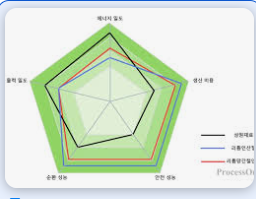


- 게임에서 많이봤다



- 평행 좌표 그래프(Parallel coordinates)를 통한 그룹별 요소 비교 시각화도 있음
- 검색어 전략캔버스

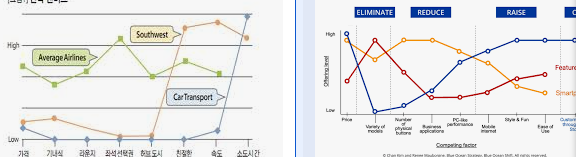

- 평행 좌표 그래프를 보다 효과적으로 표현하려면 변수별 값을 정규화해야함
- 가장 낮은 값은 0% , 가장 높은 값은 100% 로 변환하여 차이를 더욱 부각
- y축의 범위를 0과 1사이로 맞춰줘야 다른것이랑 비교하기 좋겠죵
- 여러 변수를 평행으로 배치해서 수치를 표현하기 때문에 각 그룹별 요소별 차이수준을 효과적으로 파악
- 집단적 경향성을 표현

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi # 방사형차트 그릴때 
from pandas.plotting import parallel_coordinates # 평행좌표그래프 

In [5]:
df = pd.read_csv("./data/nba2021_advanced.csv") # 농구데이터

In [7]:
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [8]:
df.shape

(497, 26)

In [9]:
# describe 는 실제로 하세용

- 2020년 부터 2021년 까지 NBA 팀 선수들의 다양한 플레이 정보가 기록된 데이터

In [11]:
df["Tm"].unique() # 너무 많으니 5개만

array(['MIA', 'MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT', 'BRK', 'CLE',
       'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO',
       'NYK', 'DEN', 'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND',
       'ATL', 'PHI', 'BOS', 'HOU'], dtype=object)

In [16]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [19]:
df1 = df.loc[df["Tm"].isin(['MIA', 'MIL', 'NOP', 'SAS', 'PHO']), ["Tm","ORB%","TRB%","AST%","BLK%","USG%"]]

In [21]:
df1.head()

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,MIA,10.5,15.4,6.8,3.8,19.7
1,MIL,0.0,9.4,13.4,0.0,19.7
2,NOP,16.9,17.5,10.1,2.0,12.8
3,MIA,6.8,15.4,27.9,3.2,24.6
4,SAS,3.2,8.4,11.4,2.8,22.3


In [23]:
# 팀별 요소 평균 전처리

df1 = df1.groupby("Tm").mean()

In [24]:
df1.head()

,ORB%,TRB%,AST%,BLK%,USG%
Tm,,,,,
MIA,3.712500,9.537500,15.093750,1.581250,18.256250
MIL,4.573333,10.213333,12.626667,1.613333,18.166667
NOP,5.453333,11.420000,12.993333,1.273333,17.460000
PHO,4.000000,9.487500,13.756250,1.600000,18.668750
SAS,4.068750,8.550000,12.143750,1.793750,19.943750


- ORB : 공격 리바운드
- blk : 블럭성공
- usg : 슛을 던지는 비율


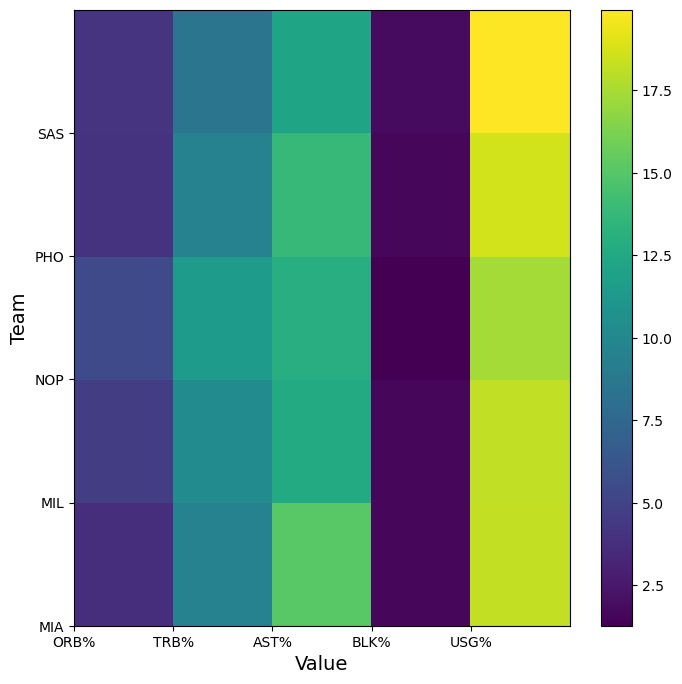

In [32]:
# 히트맵 시각화
fig = plt.figure(figsize = (8,8))
plt.pcolor(df1.values)

# x축 컬럼 설정
plt.xticks(range(len(df1.columns)), df1.columns)
# y축 컬럼 설정           
plt.yticks(range(len(df1.index)), df1.index)

plt.xlabel("Value", fontsize = 14)
plt.ylabel("Team", fontsize = 14)

plt.colorbar()
plt.show()

In [35]:
# 5개 팀의 팀명,연령, 참여 게임 수 컬럼 필터링
df2 = df.loc[df["Tm"].isin(['MIA', 'MIL', 'NOP', 'SAS', 'PHO']), 
["Tm","Age","G"]]

In [36]:
df2.head()

,Tm,Age,G
0,MIA,21,28
1,MIL,24,6
2,NOP,27,27
3,MIA,23,26
4,SAS,35,18


In [37]:
df2.head()

,Tm,Age,G
0,MIA,21,28
1,MIL,24,6
2,NOP,27,27
3,MIA,23,26
4,SAS,35,18


- G : 참여 게임 수

In [38]:
# 팀 - 연령 기준 평균으로 처리

In [50]:
# pivot_table 으로 처리 !!!!!!
df2 = df2.pivot_table( 
    index = "Tm",
    columns = "Age",
    values = "G",
    aggfunc = "mean"
)

KeyError: 'G'

In [44]:
df2

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Tm,,,,,,,,,,,,,,,,,,,
MIA,NaN,NaN,20.666667,NaN,26.00,13.333333,20.000000,28.0,10.0,3.0,27.0,10.0,16.0,NaN,NaN,17.0,NaN,NaN,26.0
MIL,NaN,NaN,NaN,10.0,NaN,13.250000,28.000000,27.0,28.0,21.5,28.0,19.0,NaN,28.0,27.0,NaN,NaN,NaN,NaN
NOP,17.0,24.0,NaN,23.0,14.75,NaN,28.000000,11.5,27.0,NaN,NaN,13.0,27.0,NaN,NaN,NaN,NaN,25.0,NaN
PHO,NaN,8.0,NaN,15.0,NaN,25.666667,17.000000,13.0,16.0,NaN,22.0,24.0,14.0,NaN,NaN,NaN,26.0,NaN,NaN
SAS,NaN,26.0,13.333333,25.0,11.00,16.000000,16.333333,8.0,NaN,NaN,NaN,NaN,25.0,27.0,NaN,26.0,18.0,NaN,NaN


<Figure size 800x800 with 0 Axes>

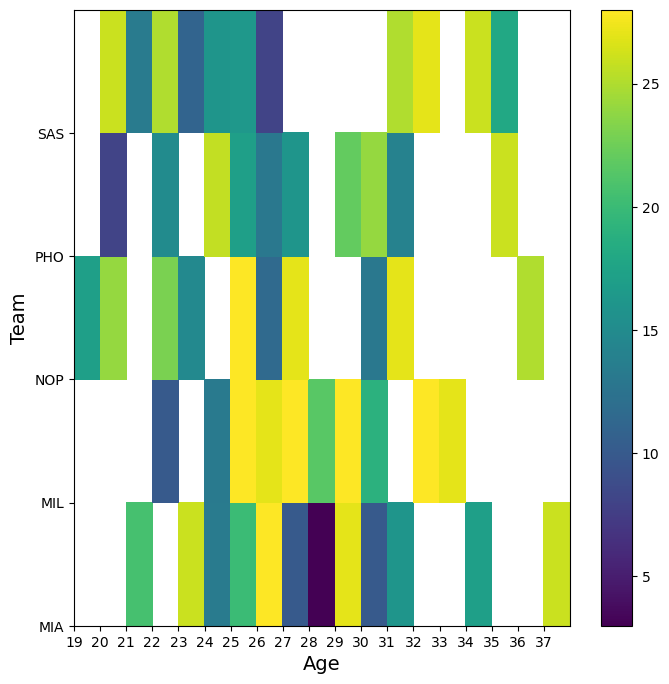

In [51]:
# 선수들의 연령에 따른 경기 참여 횟수 비교
fig = plt.figure(figsize = (8,8))

# mat 에서는 맵컬러
# seaborn 에서는 히트맵 
# 같은결과

# 히트맵 시각화
fig = plt.figure(figsize = (8,8))
plt.pcolor(df2.values)

# x축 컬럼 설정
plt.xticks(range(len(df2.columns)), df2.columns)
# y축 컬럼 설정           
plt.yticks(range(len(df2.index)), df2.index)

plt.xlabel("Age", fontsize = 14)
plt.ylabel("Team", fontsize = 14)
plt.colorbar()
plt.show()


- 팀별로 19세부터 34세까지의 나이에 따라 게임 참여 회수가 얼마나 되는지 히트맵으로 색상으로 파악
- 흰색은 null 을 뜻한다

In [52]:
# 방사형 차트를 위한 인덱스 초기화
df3 = df1.reset_index()

In [53]:
df3.head()

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,MIA,3.712500,9.537500,15.093750,1.581250,18.256250
1,MIL,4.573333,10.213333,12.626667,1.613333,18.166667
2,NOP,5.453333,11.420000,12.993333,1.273333,17.460000
3,PHO,4.000000,9.487500,13.756250,1.600000,18.668750
4,SAS,4.068750,8.550000,12.143750,1.793750,19.943750


C:\Users\ITSC\AppData\Local\Temp\ipykernel_3716\3358076892.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


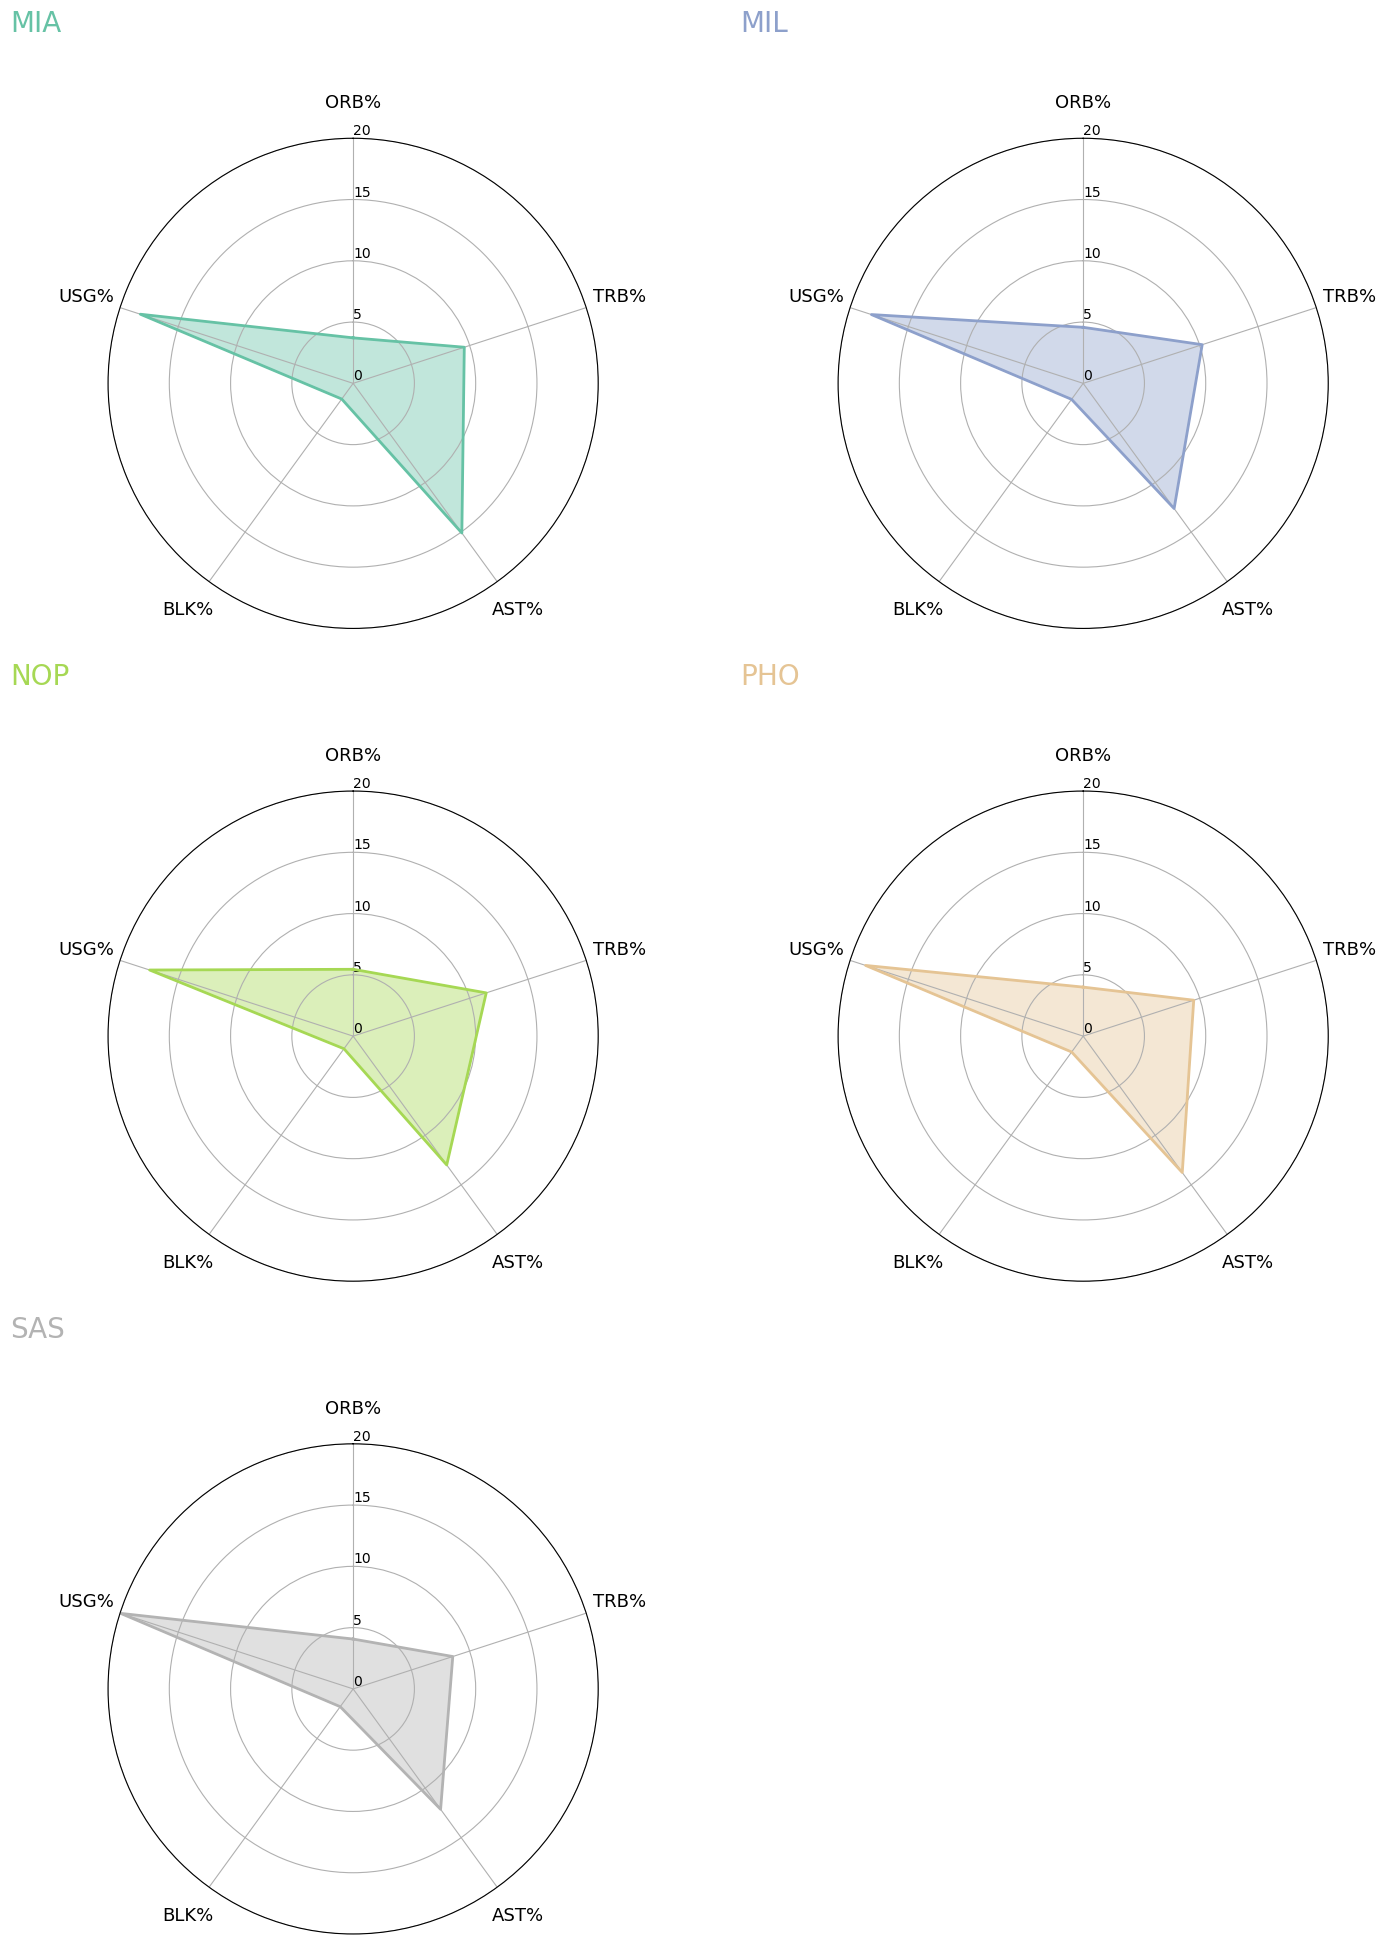

In [54]:
# 방사형 차트 - 하나씩 시각화

labels = df3.columns[1:]
num_labels = len(labels)

# 등분점 생성    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] 
angles += angles[:1] # 시작점 생성
    
my_palette = plt.cm.get_cmap("Set2", len(df3.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Tm').tolist()
    data += data[:1]

    # subplot 여러개 설정!!!!!!!!!!!!! 아래 차트랑 달라지는 코드...
    ax = plt.subplot(3,2,i+1, polar=True)
    # 시작점 설정
    ax.set_theta_offset(pi / 2)
    # 시계방향 설정
    ax.set_theta_direction(-1) 
    
    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)
    # 각 축과 눈금 사이 여백생성
    ax.tick_params(axis='x', which='major', pad=15)
    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)
    # 반지름 축 눈금 설정
    plt.yticks([0,5,10,15,20],['0','5','10','15','20'], fontsize=10) 
    plt.ylim(0,20)
    
    # 방사형 차트 출력
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    # 도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha=0.4) 
    # 각 차트의 제목 생성
    plt.title(row.Tm, size=20, color=color,x=-0.2, y=1.2, ha='left') 
# 차트 간 간격 설정 
plt.tight_layout(pad=3) 
plt.show()

C:\Users\ITSC\AppData\Local\Temp\ipykernel_3716\3188022112.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


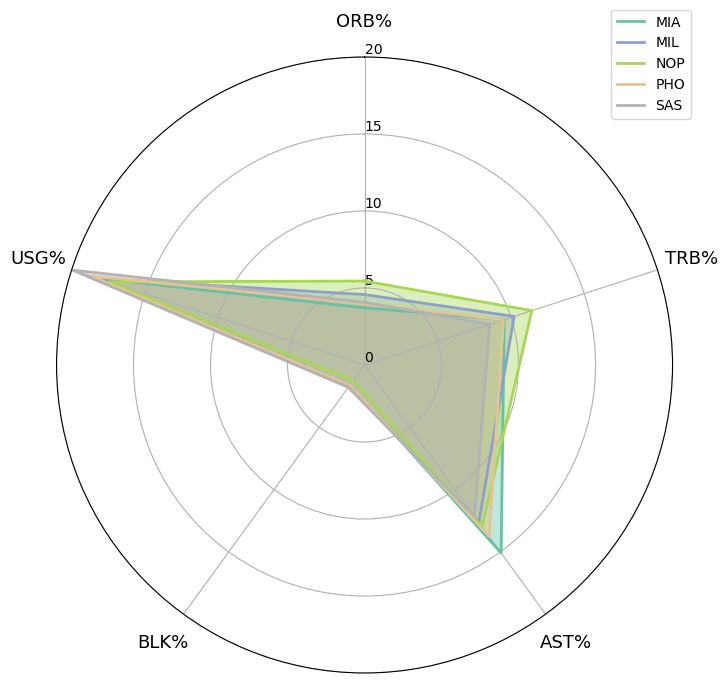

In [55]:
# 방사형 차트 - 한번에 시각화

labels = df3.columns[1:]
num_labels = len(labels)

# 등분점 생성
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
# 시작점 생성
angles += angles[:1] 
    
my_palette = plt.cm.get_cmap("Set2", len(df3.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Tm').tolist()
    data += data[:1]
    
    # 시작점
    ax.set_theta_offset(pi / 2) 
    # 시계방향 설정
    ax.set_theta_direction(-1) 
    
    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)
    # 각 축과 눈금 사이 여백생성
    ax.tick_params(axis='x', which='major', pad=15) 
    # 반지름 축 눈금 라벨 각도 0으로 설정 
    ax.set_rlabel_position(0) 
    # 반지름 축 눈금 설정
    plt.yticks([0,5,10,15,20],['0','5','10','15','20'], fontsize=10) 
    plt.ylim(0,20)
    
    # 방사형 차트 출력
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Tm) 
    # 도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha=0.4) 
    
plt.legend(loc=(0.9,0.9))
plt.show()

In [57]:
df3.head()

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,MIA,3.712500,9.537500,15.093750,1.581250,18.256250
1,MIL,4.573333,10.213333,12.626667,1.613333,18.166667
2,NOP,5.453333,11.420000,12.993333,1.273333,17.460000
3,PHO,4.000000,9.487500,13.756250,1.600000,18.668750
4,SAS,4.068750,8.550000,12.143750,1.793750,19.943750


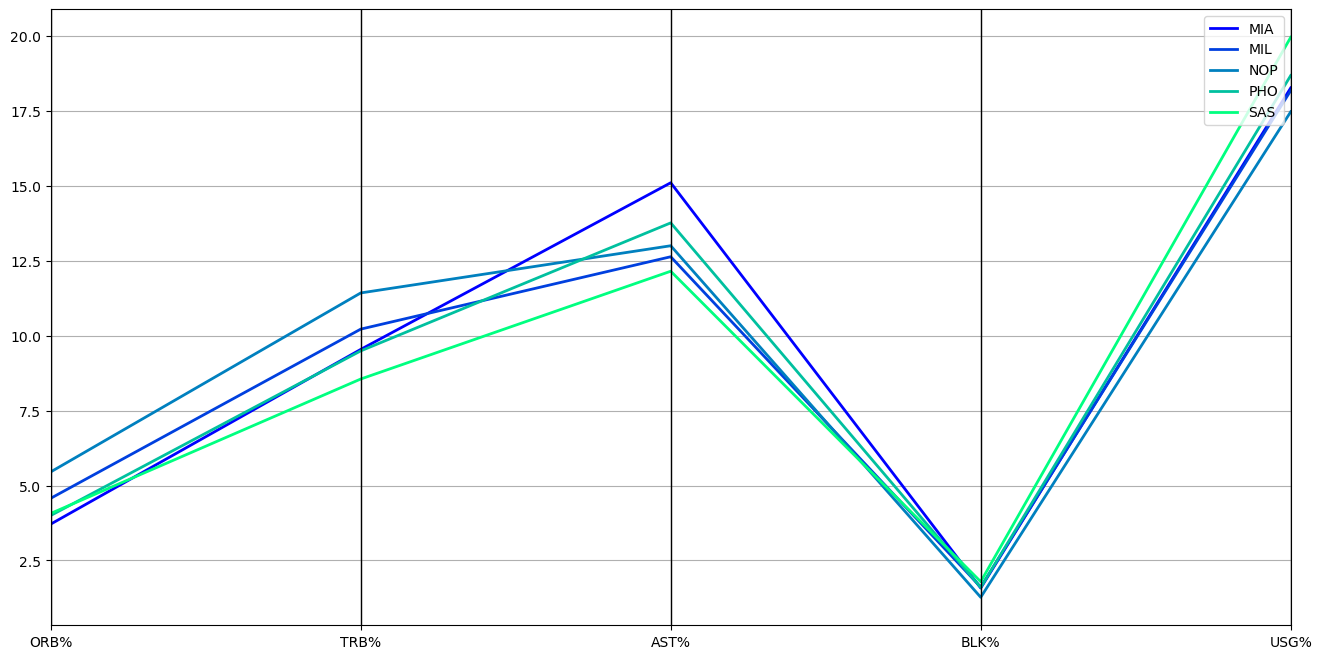

In [60]:
# 평행좌표그래프를 생성해보자구용
plt.figure(figsize = (16,8))
# parallel_coordinates 라는 메소드
parallel_coordinates(
    df3, # 데이터프레임
    "Tm", # tm 컬럼의 값을 가지고 기준을 나눠줌
    colormap = "winter", # 테마
    linewidth = 2 # 선 굵기
)
plt.show()

In [62]:
# 방사형 그래프는 plotly 를 사용하는게 편하다
import plotly.graph_objects as go

In [63]:
df1.head()

,ORB%,TRB%,AST%,BLK%,USG%
Tm,,,,,
MIA,3.712500,9.537500,15.093750,1.581250,18.256250
MIL,4.573333,10.213333,12.626667,1.613333,18.166667
NOP,5.453333,11.420000,12.993333,1.273333,17.460000
PHO,4.000000,9.487500,13.756250,1.600000,18.668750
SAS,4.068750,8.550000,12.143750,1.793750,19.943750


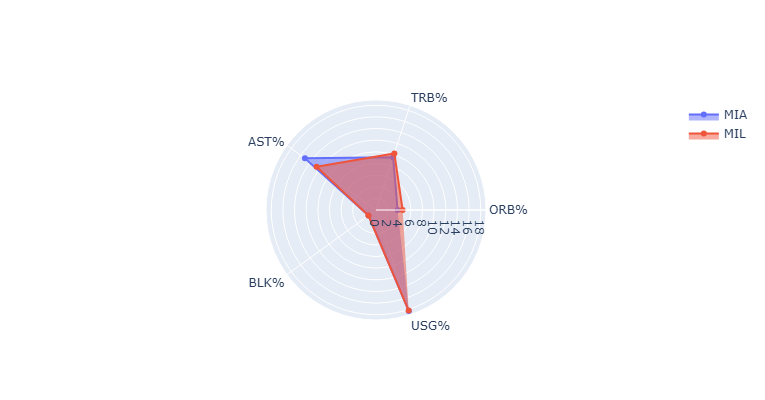

In [71]:
fig = go.Figure(data = go.Scatterpolar(
    r = df1.iloc[0], # MIA 팀의 데이터로 방사형 차트를 그려보겠다
    theta = df1.columns,
    fill = "toself",
    name = df1.index[0] # 이름
))

# 다른 팀 추가
fig.add_trace(go.Scatterpolar(
    r = df1.iloc[1],
    theta = df1.columns,
    fill = "toself",
    name = df1.index[1]
))

fig.update_layout(
    polar = dict(
        radialaxis = dict(
            visible = True
        )
    ),
    showlegend = True, # 법례쓸꺼야?
    # 크기
    width = 400,
    height = 400
)
fig.show()